In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import mean_squared_error, auc, accuracy_score, confusion_matrix, mean_squared_error

In [64]:
pwd

'/Users/medamin/_Projets/_DataScience/DirectOfInformaiton_Project'

In [65]:
pd.options.display.max_rows =10
pd.options.display.max_columns = 500
pd.set_option.display_width=1000

df=pd.read_excel('data/GD6.xlsx', index_col=None, header=0)

In [66]:
df.tail()

,CPR_NO,NAME,ENAME,SCH_NM,PROV_NM,SUBM,Teacher_Gender,ACHIEVEMENTS1,ACHIEVEMENTS2,MIDTERM1,MIDTERM2,FINAL1,FINAL2,TOTAL1,TOTAL2,D_MARK,NAT_MARK,GPA
24185,70304602,هزاع أحمد يوسف الكعبي,HAZZA AHMED YUSUF ALKAABI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,28.0,20.0,18.0,47.0,42.0,97.0,88,93,61.9,94.636364
24186,71007423,يوسف سعيد عمير السليمان,YOUSIF SAEED OMAIR ALSULAIMAN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,30.0,25.0,17.0,15.0,17.0,14.5,64.0,55,60,44.5,85.181818
24187,70402183,يوسف عبدالمنعم علي حسين,YOUSIF ABDULMUNEM ALI HUSAIN,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,26.0,27.0,12.0,17.0,24.0,22.0,62.0,66,64,44.5,82.727273
24188,70803196,يوسف محمد عبدالله المناعي,YOUSIF MOHAMED ABDULLA ALMANNAEI,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,28.0,28.0,18.0,18.0,37.0,23.5,83.0,70,77,46.3,89.181818
24189,70211361,يوسف مصطفى محمد عبدالله,YOUSIF MUSTAFA MOHAMMED ABDULLA,مدرسة وادي السيل الابتدائية الاعدادية للبنين,المحافظة الجنوبية,الرياضيات,مدرسين,29.0,27.0,14.0,16.0,16.0,19.5,59.0,63,61,39.0,81.818182


In [67]:
len(df.SUBM.unique())

2

In [68]:
df.isnull().sum()

CPR_NO       0
NAME         0
ENAME        0
SCH_NM       0
PROV_NM      0
            ..
TOTAL1      16
TOTAL2       0
D_MARK       0
NAT_MARK     0
GPA          0
Length: 18, dtype: int64

In [69]:
df.dtypes

CPR_NO        int64
NAME         object
ENAME        object
SCH_NM       object
PROV_NM      object
             ...   
TOTAL1      float64
TOTAL2        int64
D_MARK        int64
NAT_MARK    float64
GPA         float64
Length: 18, dtype: object

In [70]:
df.keys()

Index(['CPR_NO', 'NAME', 'ENAME', 'SCH_NM', 'PROV_NM', 'SUBM',
       'Teacher_Gender', 'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1',
       'MIDTERM2', 'FINAL1', 'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK',
       'NAT_MARK', 'GPA'],
      dtype='object')

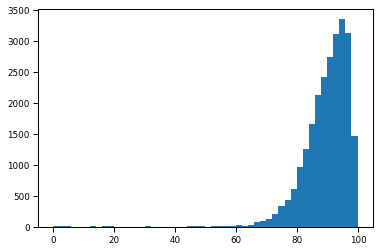

In [71]:
plt.hist(df["GPA"], bins=50)
plt.show()

In [72]:
df['PROV_NM'].value_counts()

المحافظة الشمالية    8246
المحافظة الجنوبية    5936
محافظة المحرق        5046
محافظة العاصمة       4962
Name: PROV_NM, dtype: int64

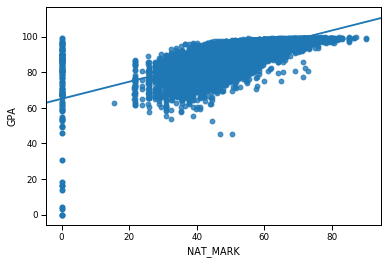

In [73]:
# continous=['SCH_NM', 'PROV_NM', 'SUBM',
#        'Teacher_Gender' ]
# for it in continous:
plt.figure()
sns.regplot("NAT_MARK", "GPA",data=df)
plt.show()

In [74]:
df=df.drop(['NAME', 'ENAME'], axis=1)

In [75]:
df.PROV_NM = df["PROV_NM"].map({'المحافظة الجنوبية':'South', 'المحافظة الشمالية':'North',\
                                'محافظة العاصمة': 'Cap',  \
                                'محافظة المحرق':'Muharaq'})

In [76]:
df.SUBM = df["SUBM"].map({'العلوم':'Science',   
                          'الرياضيات':'Math'})

In [77]:
df.Teacher_Gender = df["Teacher_Gender"].map({'مدرسات':'F', 'مدرسين':'M'})

In [78]:
categoricals=df.dtypes[df.dtypes=='object'].index.tolist()
categoricals

['SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender']

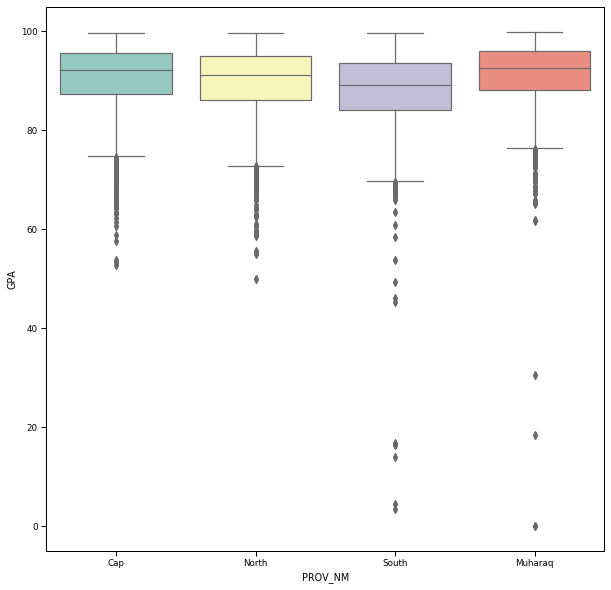

In [79]:
plt.figure( figsize=(10,10))
sns.boxplot("PROV_NM", "GPA",  data=df, palette="Set3")
plt.show()

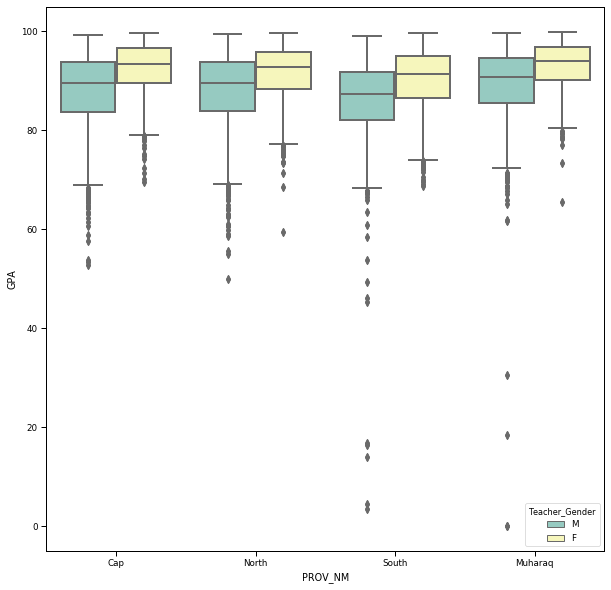

In [80]:
plt.figure( figsize=(10,10))
ax=sns.boxplot("PROV_NM", "GPA",hue="Teacher_Gender",  data=df,  palette="Set3", linewidth=2)

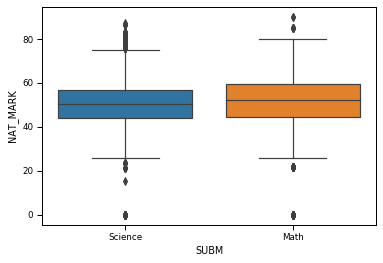

In [81]:
ax = sns.boxplot(x="SUBM", y="NAT_MARK", data=df)
#ax = sns.swarmplot(x="SUBM", y="NAT_MARK", data=df, color=".25")

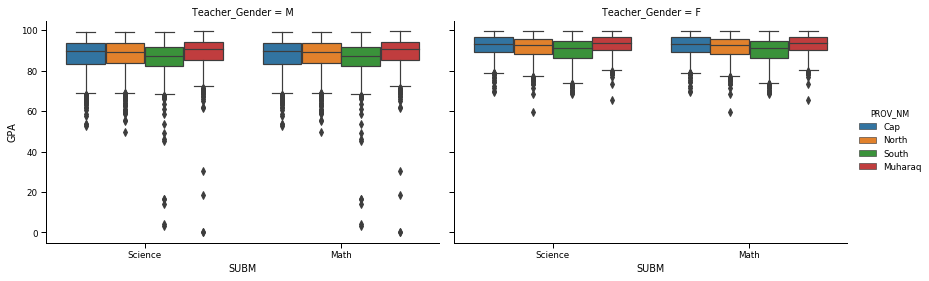

In [82]:
g = sns.catplot(x="SUBM", y="GPA",hue="PROV_NM", col="Teacher_Gender",data=df, kind="box",height=4, aspect=1.5);

In [83]:
from scipy import stats
all_categoricals=[]
binary_categoricals=df.describe(include="object").columns.tolist()
binary_categoricals=[ it for it in binary_categoricals if len(df[it].unique())==2 ]

In [84]:
binary_categoricals

['SUBM', 'Teacher_Gender']

In [85]:
len(df["Teacher_Gender"].unique())

2

In [43]:
#for it in binary_categoricals:
grouped=df[["Teacher_Gender", "NAT_MARK"]].groupby("Teacher_Gender")
f_val, p_val=stats.f_oneway(grouped.get_group("M")["NAT_MARK"], grouped.get_group("F")["NAT_MARK"])
all_categoricals.append(["Teacher_Gender", f_val, p_val])
print("{} =>ANOVA resulsts : F={} , p={}".format("Teacher_Gender", f_val, p_val))

Teacher_Gender =>ANOVA resulsts : F=1534.878909486592 , p=0.0


In [44]:
all_categoricals

[['Teacher_Gender', 1534.878909486592, 0.0]]

In [45]:
grouped.max()

,NAT_MARK
Teacher_Gender,
F,90.0
M,86.4


In [46]:
grouped.min()

,NAT_MARK
Teacher_Gender,
F,0.0
M,0.0


In [47]:
grouped=df[["SUBM", "NAT_MARK"]].groupby("SUBM")
f_val, p_val=stats.f_oneway(grouped.get_group("Science")["NAT_MARK"], grouped.get_group("Math")["NAT_MARK"])
all_categoricals.append(["SUBM", f_val, p_val])
print("{} =>ANOVA resulsts : F={} , p={}".format("SUBM", f_val, p_val))

SUBM =>ANOVA resulsts : F=48.443548673712506 , p=3.4861513981475274e-12


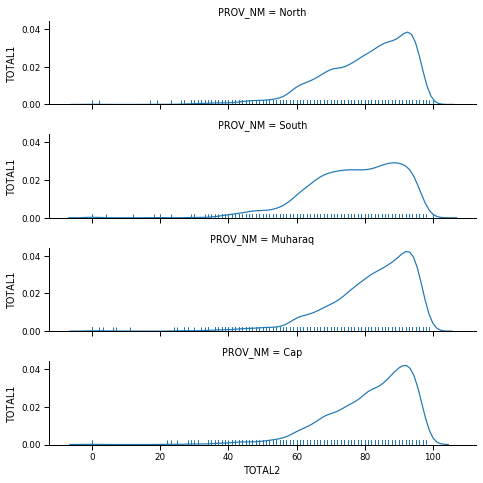

In [86]:
province=df.PROV_NM.value_counts().index
g=sns.FacetGrid(df, row="PROV_NM",row_order=province,  height=1.7,  aspect=4)
g.map(sns.distplot, "TOTAL2", "TOTAL1", hist=False, rug=True)
plt.show()

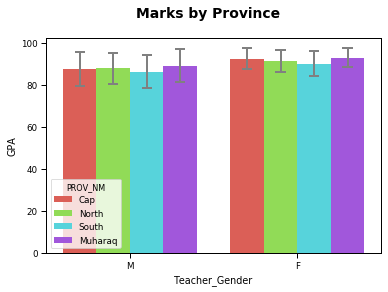

In [87]:
fig = plt.figure()
fig.suptitle('Marks by Province', fontsize='x-large', fontweight='bold')
fig.subplots_adjust(top=0.87)
sns.set_context('paper')
sns.barplot(x = 'Teacher_Gender', y = 'GPA', hue = 'PROV_NM', data = df,
            palette = 'hls',
            order = ['M', 'F'],  
            capsize = 0.05,             
            saturation = 8,             
            errcolor = 'gray', errwidth = 2,  
            ci = 'sd'   
            )
plt.show()

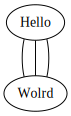

In [61]:
from graphviz import Graph
h.edge('Hello', 'Wolrd')
h

In [62]:
df.keys()

Index(['CPR_NO', 'SCH_NM', 'PROV_NM', 'SUBM', 'Teacher_Gender',
       'ACHIEVEMENTS1', 'ACHIEVEMENTS2', 'MIDTERM1', 'MIDTERM2', 'FINAL1',
       'FINAL2', 'TOTAL1', 'TOTAL2', 'D_MARK', 'NAT_MARK', 'GPA'],
      dtype='object')

In [100]:
sch=df.FINAL1.value_counts()
sch

50.0    1652
49.0    1077
48.0     934
40.0     885
47.0     863
        ... 
82.0       1
3.5        1
94.0       1
62.0       1
2.5        1
Name: FINAL1, Length: 106, dtype: int64

In [101]:
quantiles=[0, 0.1, .02, .03, .04, .05, .1, .25, .5, .75, .9,.95, .96,  .97, .98, .99, 1 ]
print(" National MARK\n",sch.quantile(quantiles) )

 National MARK
 0.00       1.00
0.10       5.50
0.02       1.00
0.03       1.00
0.04       1.00
         ...   
0.96     851.80
0.97     881.70
0.98     929.10
0.99    1069.85
1.00    1652.00
Name: FINAL1, Length: 17, dtype: float64


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


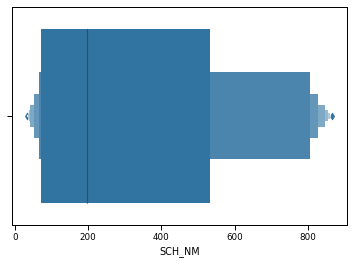

In [97]:
sns.boxenplot(sch.quantile(quantiles))